In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [2]:
df2 = pd.read_csv('Past+New_Wells/clean_new_well_data.csv')

In [3]:
df = pd.read_csv('AASG_Thermed_AllTempsThicksConds.csv',low_memory=False)

In [4]:
df2

,id,depth,temp,lat,lon,corrtemp
0,4703502978,671.1696,23.648778,38.79,-81.81,26.289471
1,4703502978,671.3220,23.646333,38.79,-81.81,26.289471
2,4703502978,671.4744,23.643444,38.79,-81.81,26.289471
3,4703502978,671.6268,23.640278,38.79,-81.81,26.295034
4,4703502978,671.7792,23.636778,38.79,-81.81,26.275346
...,...,...,...,...,...,...
582743,4710300645,2021.9670,56.438889,39.68,-80.82,64.747553
582744,4710300645,2022.0432,56.444444,39.68,-80.82,64.747553
582745,4710300645,2022.1194,56.444444,39.68,-80.82,64.747553
582746,4710300645,2022.1956,56.444444,39.68,-80.82,64.747553


# Find Closest Points for Estimation with Phys Model

1. Get Random 100 points from df2

In [5]:
num_sample=10000
sampled_df2 = df2.sample(num_sample)

In [6]:
import math
def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

In [7]:
# Round by 10 to later compare with T1~T500
sampled_df2.depth = np.round(sampled_df2.depth,decimals=-1).astype('int')

In [8]:
sampled_df2

,id,depth,temp,lat,lon,corrtemp
347905,4704701120,1030,24.316667,37.48,-81.86,28.944832
521808,4703501366,1210,32.377778,38.73,-81.57,38.392887
427531,4709100138,1120,36.511111,39.34,-80.18,42.023391
393288,4704301637,650,11.894444,38.10,-82.22,12.742154
98094,4700102985,1080,41.633333,39.20,-80.02,46.466307
...,...,...,...,...,...,...
37572,4708509707,1750,36.416667,39.23,-81.06,45.848597
429962,4709100138,1300,40.977778,39.34,-80.18,47.673000
235312,4704102039,1380,48.377778,39.10,-80.65,55.200044
503420,4700502167,1400,46.533333,37.98,-81.86,54.068410


2. Find closest point in lat and lon

In [9]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(np.transpose(np.array([df.LatDegree, df.LongDegree])))
pred_indices = neigh.kneighbors(np.transpose(np.array([sampled_df2.lat,sampled_df2.lon])),return_distance=False)

In [10]:
sampled_df2.insert(6, 'closest',pred_indices)

In [11]:
sampled_df2.reset_index(inplace=True)

In [12]:
sampled_df2

,index,id,depth,temp,lat,lon,corrtemp,closest
0,347905,4704701120,1030,24.316667,37.48,-81.86,28.944832,18943
1,521808,4703501366,1210,32.377778,38.73,-81.57,38.392887,18192
2,427531,4709100138,1120,36.511111,39.34,-80.18,42.023391,19659
3,393288,4704301637,650,11.894444,38.10,-82.22,12.742154,18690
4,98094,4700102985,1080,41.633333,39.20,-80.02,46.466307,16551
...,...,...,...,...,...,...,...,...
9995,37572,4708509707,1750,36.416667,39.23,-81.06,45.848597,19605
9996,429962,4709100138,1300,40.977778,39.34,-80.18,47.673000,19659
9997,235312,4704102039,1380,48.377778,39.10,-80.65,55.200044,18533
9998,503420,4700502167,1400,46.533333,37.98,-81.86,54.068410,16617


In [13]:
predicted_values_by_physics_model = []
for i in range(0, num_sample):
    curr_depth = sampled_df2.depth[i]
    curr_row = df.loc[sampled_df2.closest[i]] # obtain the row
    t_string = 'T'+str(int(curr_depth/10))
    predicted_value = curr_row[t_string]
    predicted_values_by_physics_model.append(predicted_value)

In [14]:
predicted_values_by_physics_model = np.array(predicted_values_by_physics_model)

In [15]:
sampled_df2.insert(8, 'physics_pred', predicted_values_by_physics_model)

In [16]:
sampled_df2

,index,id,depth,temp,lat,lon,corrtemp,closest,physics_pred
0,347905,4704701120,1030,24.316667,37.48,-81.86,28.944832,18943,32.3
1,521808,4703501366,1210,32.377778,38.73,-81.57,38.392887,18192,45.1
2,427531,4709100138,1120,36.511111,39.34,-80.18,42.023391,19659,29.2
3,393288,4704301637,650,11.894444,38.10,-82.22,12.742154,18690,32.4
4,98094,4700102985,1080,41.633333,39.20,-80.02,46.466307,16551,45.4
...,...,...,...,...,...,...,...,...,...
9995,37572,4708509707,1750,36.416667,39.23,-81.06,45.848597,19605,47.9
9996,429962,4709100138,1300,40.977778,39.34,-80.18,47.673000,19659,31.8
9997,235312,4704102039,1380,48.377778,39.10,-80.65,55.200044,18533,50.3
9998,503420,4700502167,1400,46.533333,37.98,-81.86,54.068410,16617,57.6


# Add Geological Information

- Predict: Geological information of sampled_df2, cond1*thick1 + ...

In [17]:
lat_to_interpolate = sampled_df2.lat
lon_to_interpolate = sampled_df2.lon

In [18]:
layers = df.iloc[:,52:101].values
conds = df.iloc[:,101:150].values
mult = np.multiply(layers,conds)
np.nan_to_num(mult, 0)
mult.shape

(20750, 49)

In [19]:
# Read optimal values
f = open("optim_result.out", "r")
lines = f.readlines()

In [20]:
optimal_neigh = []
optimal_width = []
for line in lines:
    optimal_neigh.append(line.split(',')[0][0])
    optimal_width.append(line.split(',')[1])
optimal_neigh = np.array(optimal_neigh).astype('int')
optimal_width = np.array(optimal_width).astype('float')

In [21]:
# Predict 49 layers information for each sampled_df2 lat and lon
from sklearn.neighbors import KNeighborsRegressor
predicted_mults = []
for i in range(0,49):
    def gaussian_kernel(distances):
                kernel_width = optimal_width[i]
                weights = np.exp(-(distances**2)/kernel_width)
                return weights
    knn = KNeighborsRegressor(n_neighbors=optimal_neigh[i],weights=gaussian_kernel)
    knn.fit(np.transpose(np.array([df.LatDegree, df.LongDegree])), mult[:,i])
    y_pred = knn.predict(np.transpose(np.array([sampled_df2.lat, sampled_df2.lon])))
    predicted_mults.append(y_pred)

In [22]:
predicted_mults = np.transpose(np.array(predicted_mults))

In [23]:
# Predict T_SURF
def gaussian_kernel(distances):
            kernel_width = 2.598
            weights = np.exp(-(distances**2)/kernel_width)
            return weights
knn = KNeighborsRegressor(n_neighbors=1,weights=gaussian_kernel)
knn.fit(np.transpose(np.array([df.LatDegree, df.LongDegree])), df.SurfTemp)
predicted_tsurf = knn.predict(np.transpose(np.array([sampled_df2.lat, sampled_df2.lon])))

# Prediction with RF

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor(max_depth = 9)
X_train = np.transpose(np.array([df.LatDegree,
                                df.LongDegree,
                                df.MeasureDepth_m,
                                df.SurfTemp]))
y_train = df.CorrBHT

In [26]:
X_train = np.concatenate((X_train, mult),axis=1)

In [27]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
X_test = np.transpose(np.array([sampled_df2.lat,
                               sampled_df2.lon,
                               sampled_df2.depth,
                               predicted_tsurf]))
X_test = np.concatenate((X_test, predicted_mults),axis=1)
y_pred = rf.predict(X_test)

In [29]:
sampled_df2.insert(9, 'rf_pred', y_pred)

In [30]:
sampled_df2

,index,id,depth,temp,lat,lon,corrtemp,closest,physics_pred,rf_pred
0,347905,4704701120,1030,24.316667,37.48,-81.86,28.944832,18943,32.3,36.466215
1,521808,4703501366,1210,32.377778,38.73,-81.57,38.392887,18192,45.1,40.877343
2,427531,4709100138,1120,36.511111,39.34,-80.18,42.023391,19659,29.2,37.617090
3,393288,4704301637,650,11.894444,38.10,-82.22,12.742154,18690,32.4,28.031074
4,98094,4700102985,1080,41.633333,39.20,-80.02,46.466307,16551,45.4,37.198683
...,...,...,...,...,...,...,...,...,...,...
9995,37572,4708509707,1750,36.416667,39.23,-81.06,45.848597,19605,47.9,57.003206
9996,429962,4709100138,1300,40.977778,39.34,-80.18,47.673000,19659,31.8,41.135687
9997,235312,4704102039,1380,48.377778,39.10,-80.65,55.200044,18533,50.3,41.552920
9998,503420,4700502167,1400,46.533333,37.98,-81.86,54.068410,16617,57.6,47.149380


# Compare Metrics

In [31]:
y_true = sampled_df2.corrtemp
y_phy = sampled_df2.physics_pred
y_rf = sampled_df2.rf_pred

In [32]:
np.mean(abs(y_true-y_phy))

8.778520781406813

In [33]:
np.sqrt(np.mean((y_true-y_phy)**2))

12.19306245732279

In [34]:
np.mean(abs(y_true-y_rf))

7.252907945122382

In [35]:
np.sqrt(np.mean((y_true-y_rf)**2))

9.214885200860673

Text(0, 0.5, 'Prediction Value')

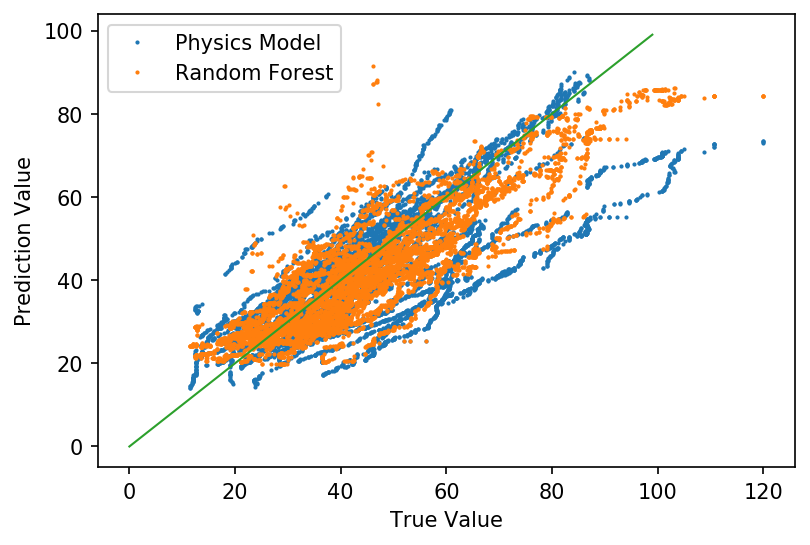

In [36]:
plt.plot(y_true, y_phy,lineStyle='none',marker='o',markersize=1,label='Physics Model')
plt.plot(y_true,y_rf,lineStyle='none',marker='o',markersize=1, label='Random Forest')
plt.plot(list(range(0,100)),list(range(0,100)),linewidth=1)
plt.legend()
plt.xlabel('True Value')
plt.ylabel('Prediction Value')

In [37]:
sampled_df2

,index,id,depth,temp,lat,lon,corrtemp,closest,physics_pred,rf_pred
0,347905,4704701120,1030,24.316667,37.48,-81.86,28.944832,18943,32.3,36.466215
1,521808,4703501366,1210,32.377778,38.73,-81.57,38.392887,18192,45.1,40.877343
2,427531,4709100138,1120,36.511111,39.34,-80.18,42.023391,19659,29.2,37.617090
3,393288,4704301637,650,11.894444,38.10,-82.22,12.742154,18690,32.4,28.031074
4,98094,4700102985,1080,41.633333,39.20,-80.02,46.466307,16551,45.4,37.198683
...,...,...,...,...,...,...,...,...,...,...
9995,37572,4708509707,1750,36.416667,39.23,-81.06,45.848597,19605,47.9,57.003206
9996,429962,4709100138,1300,40.977778,39.34,-80.18,47.673000,19659,31.8,41.135687
9997,235312,4704102039,1380,48.377778,39.10,-80.65,55.200044,18533,50.3,41.552920
9998,503420,4700502167,1400,46.533333,37.98,-81.86,54.068410,16617,57.6,47.149380


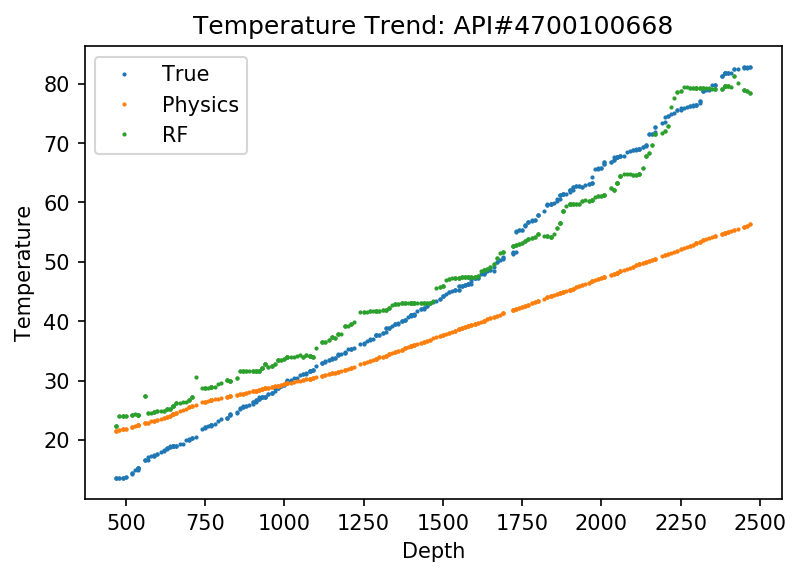

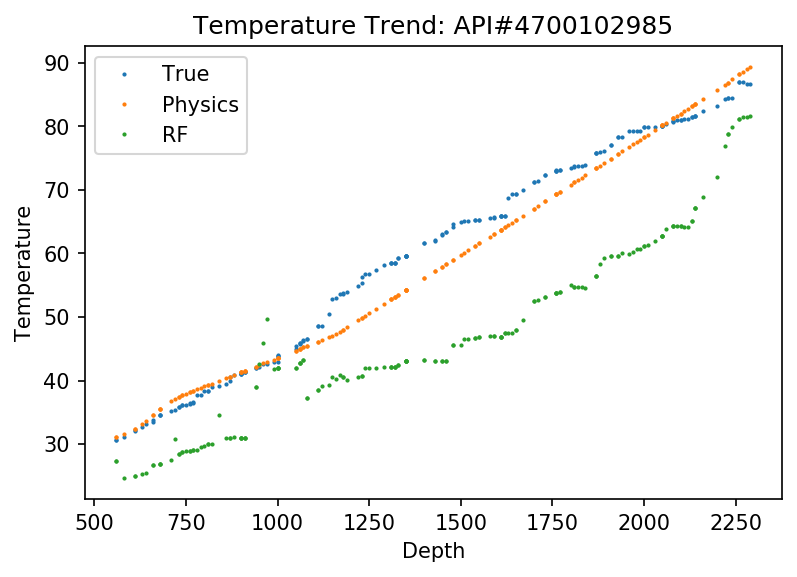

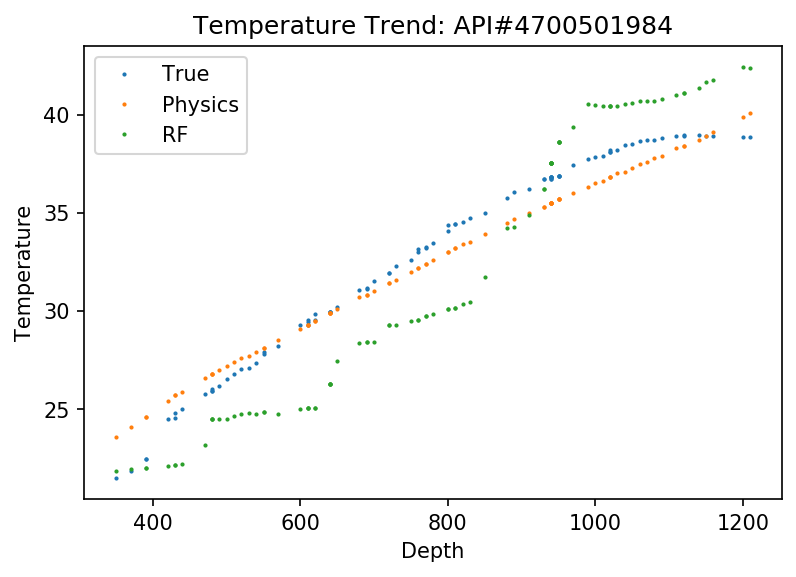

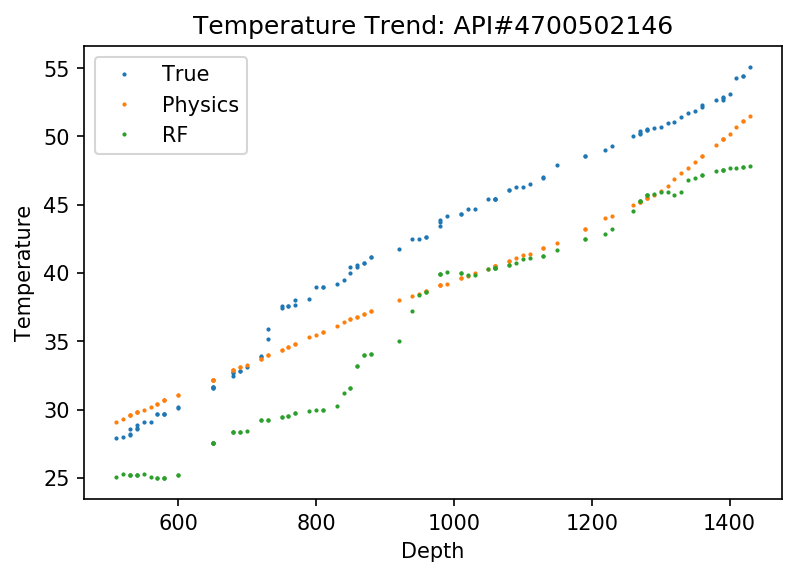

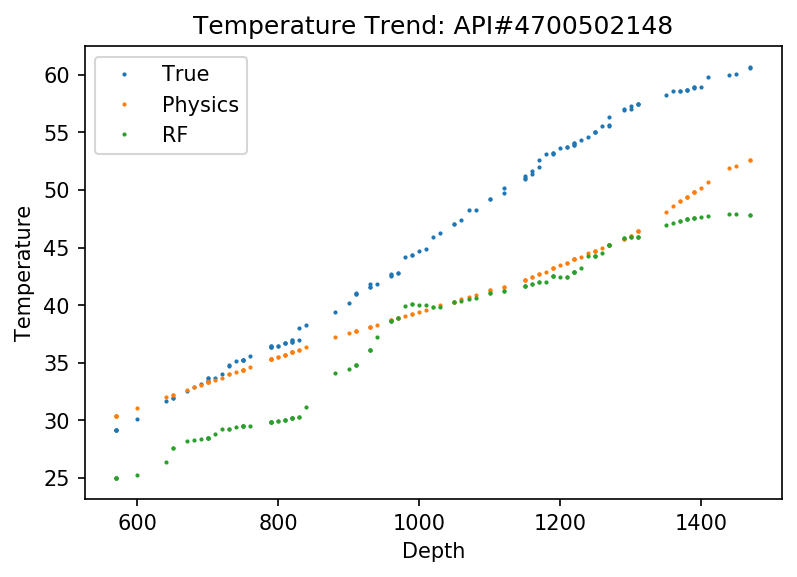

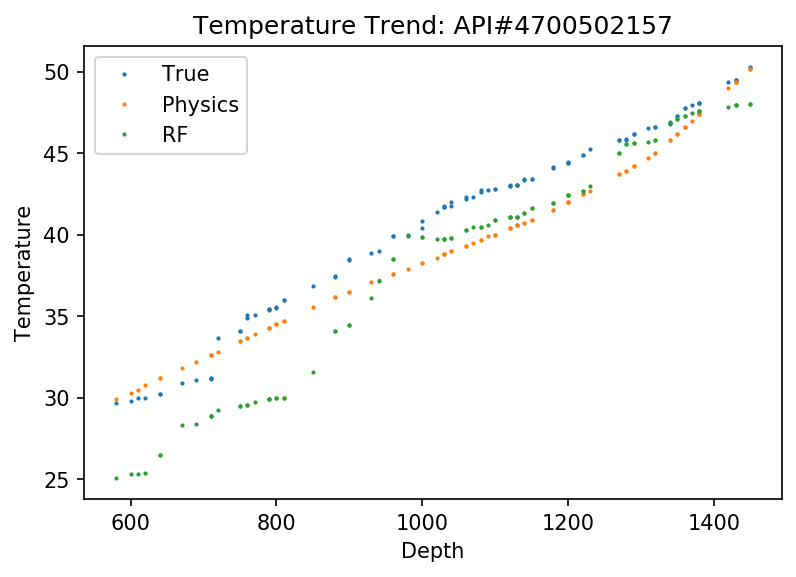

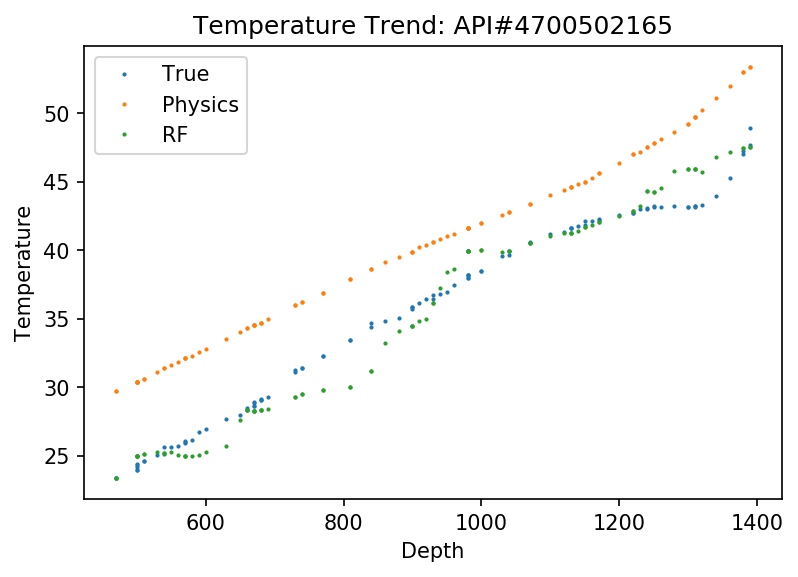

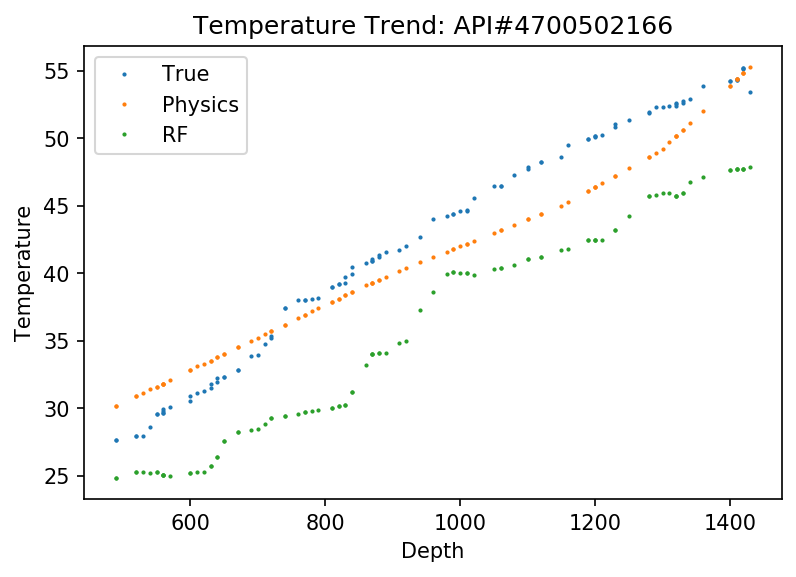

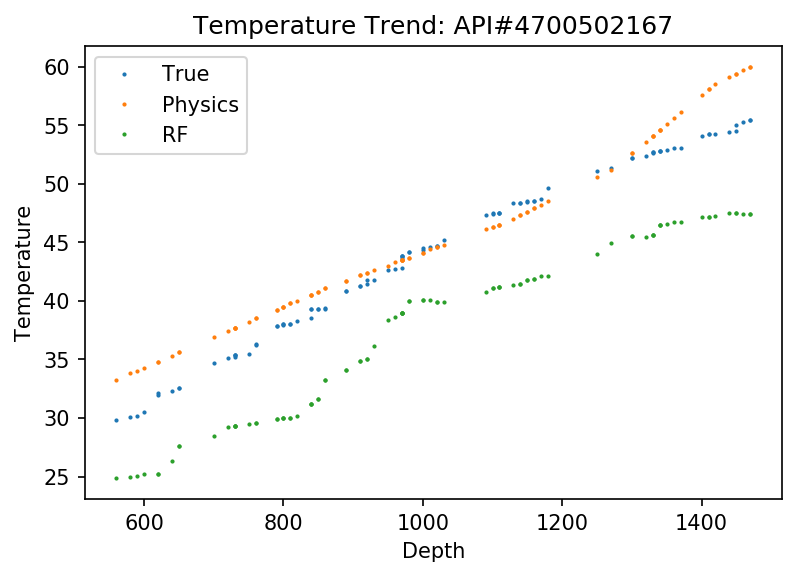

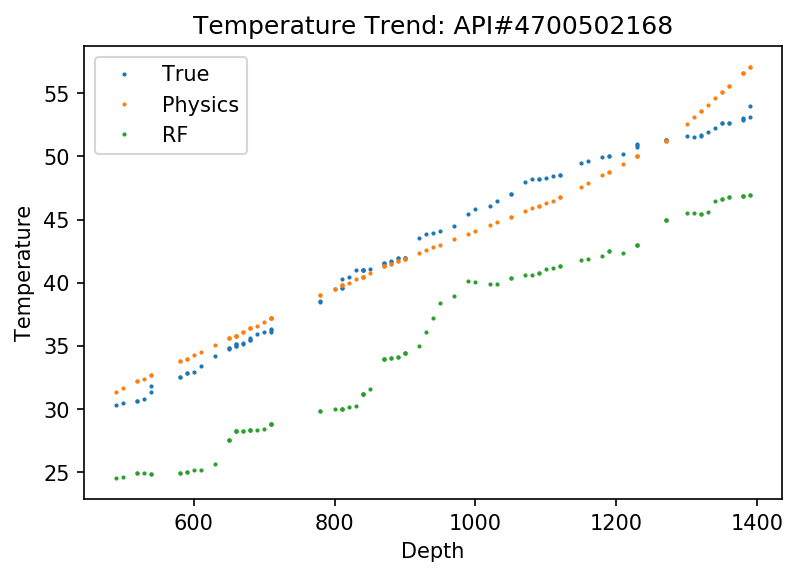

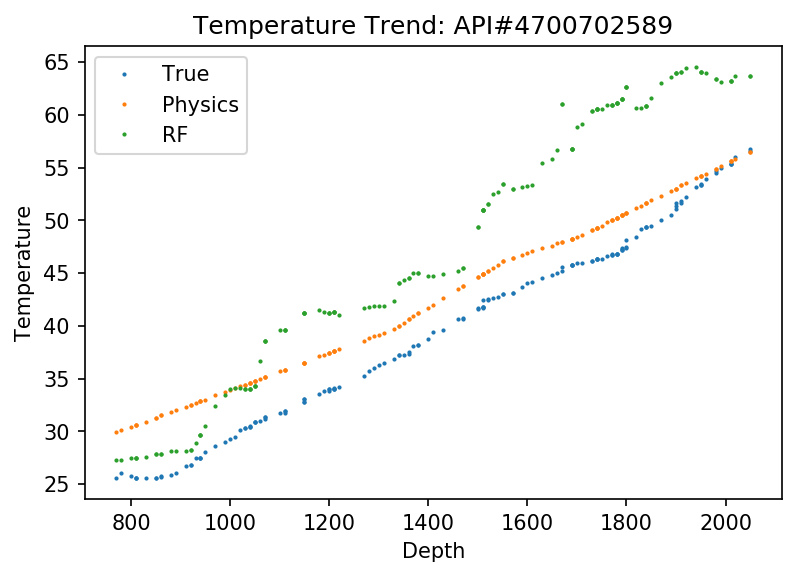

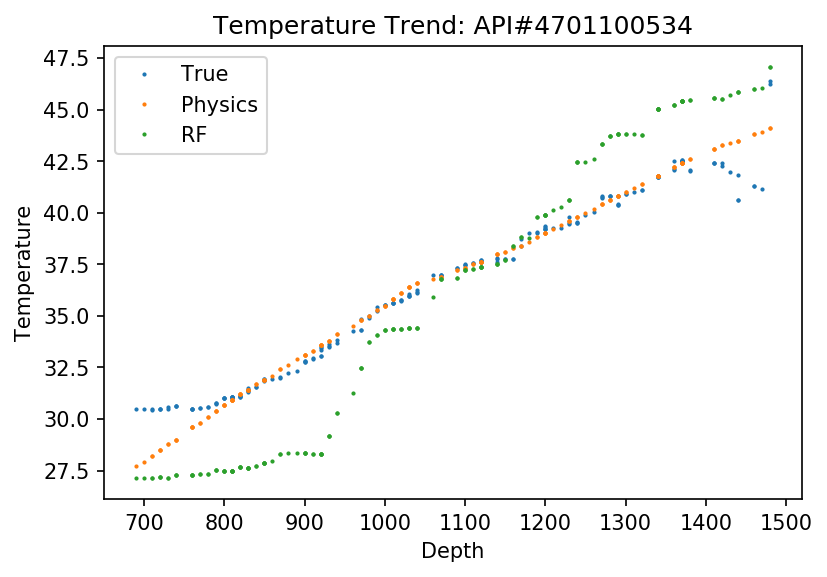

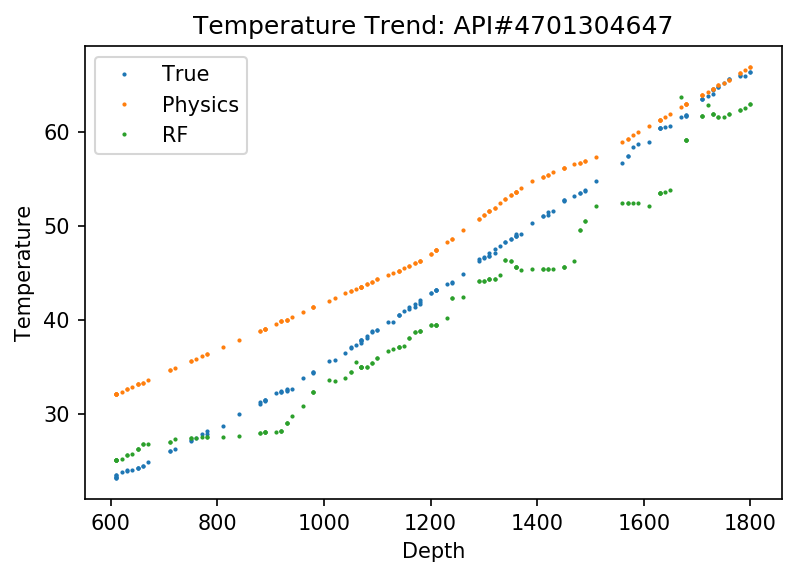

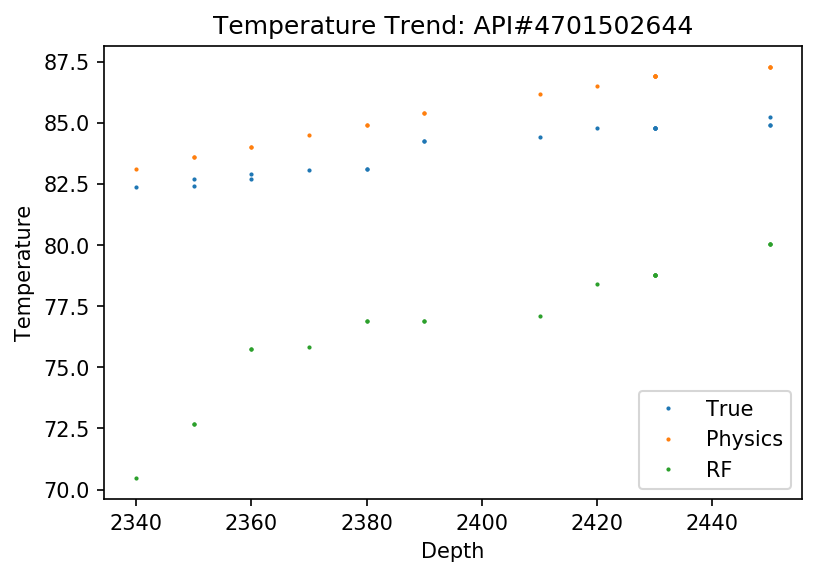

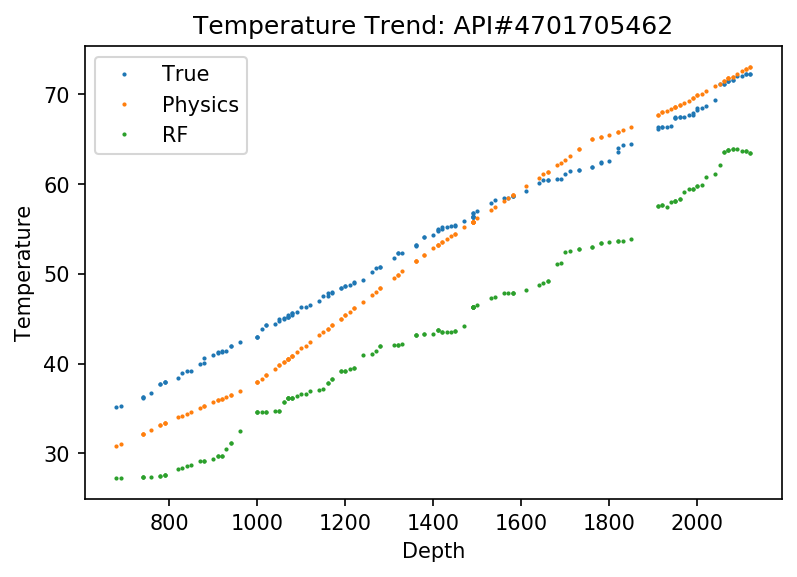

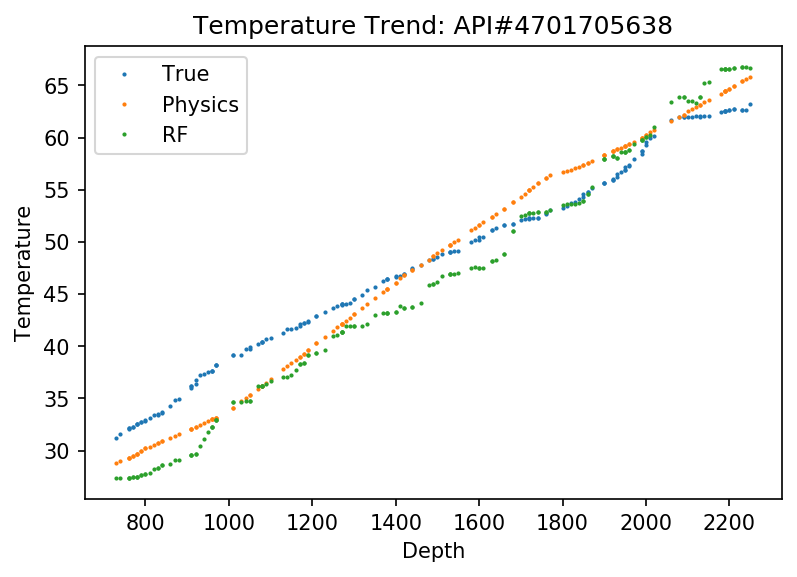

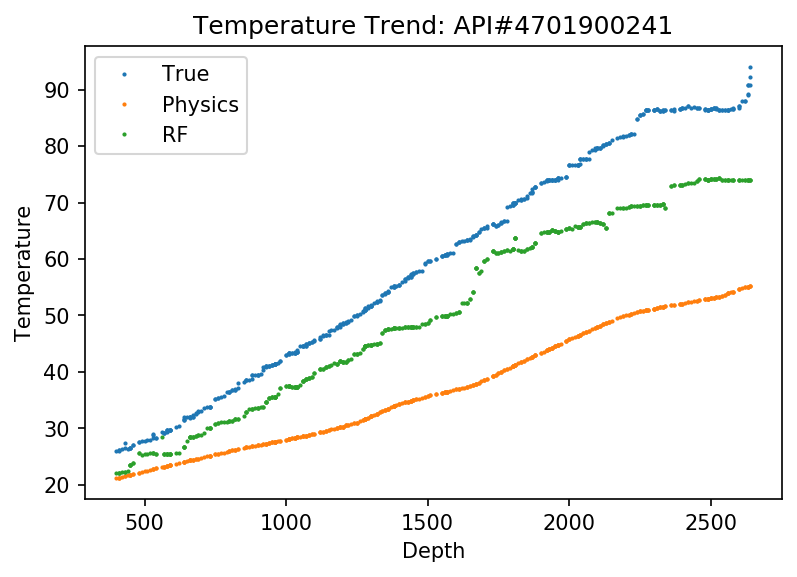

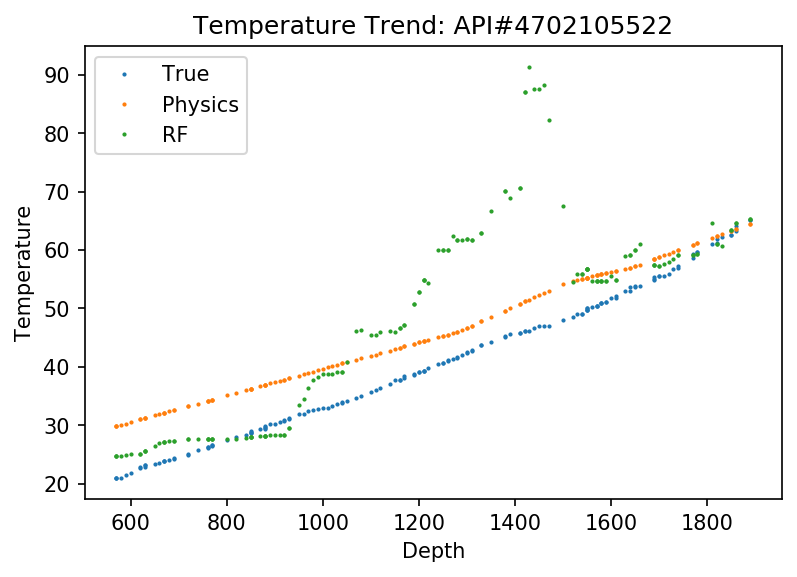

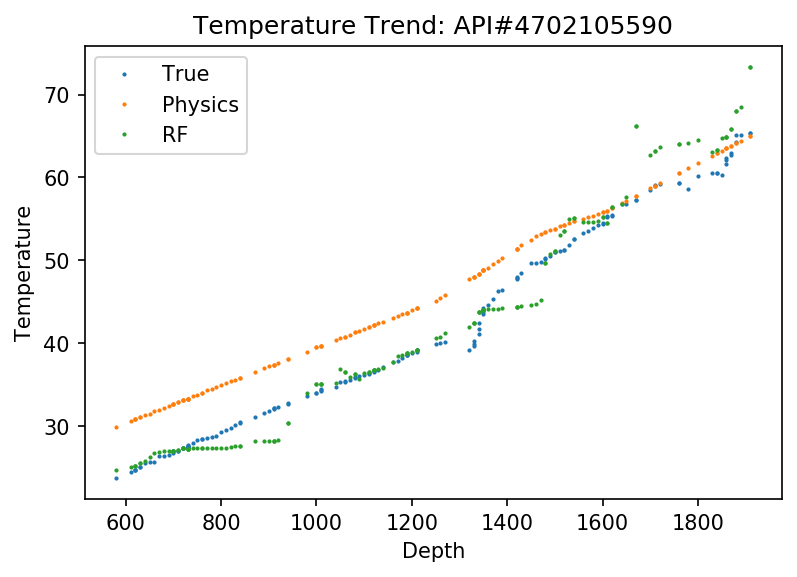

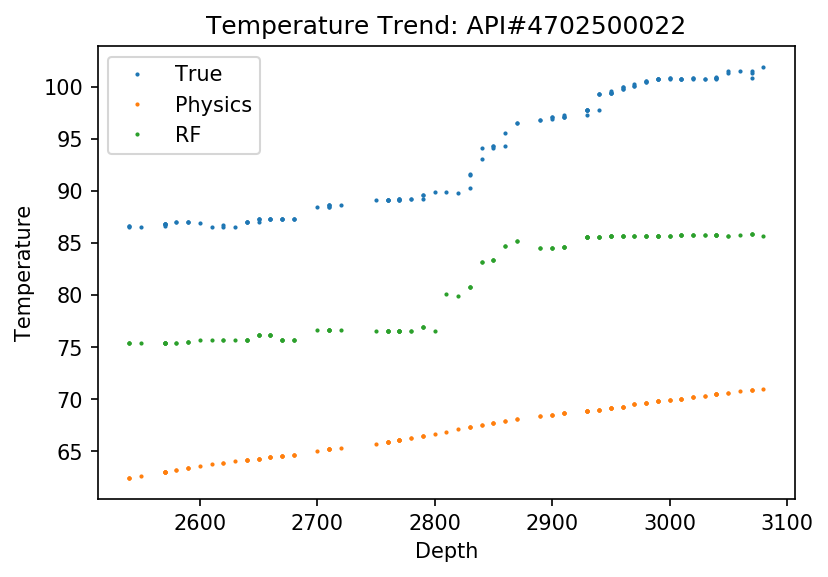

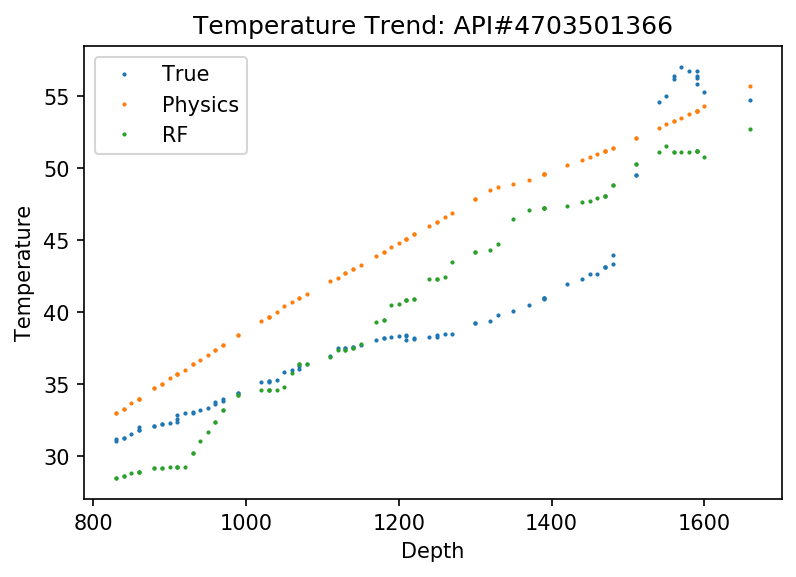

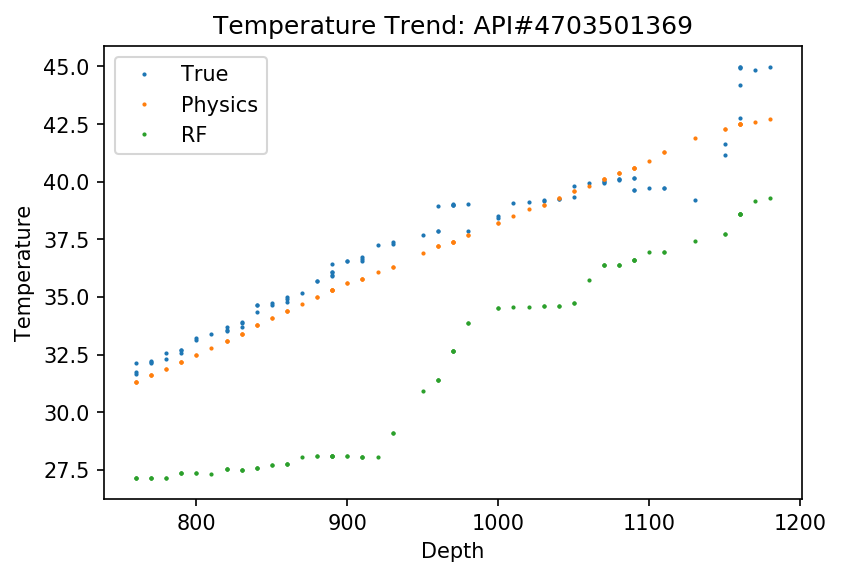

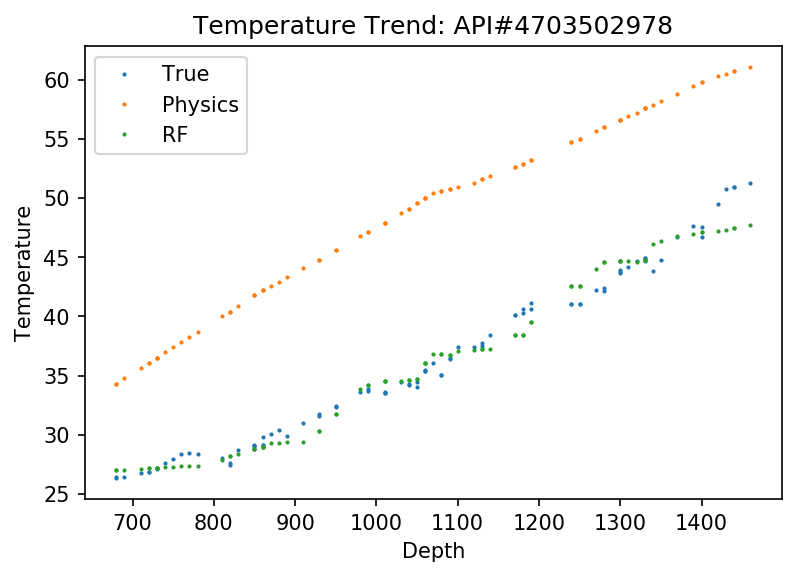

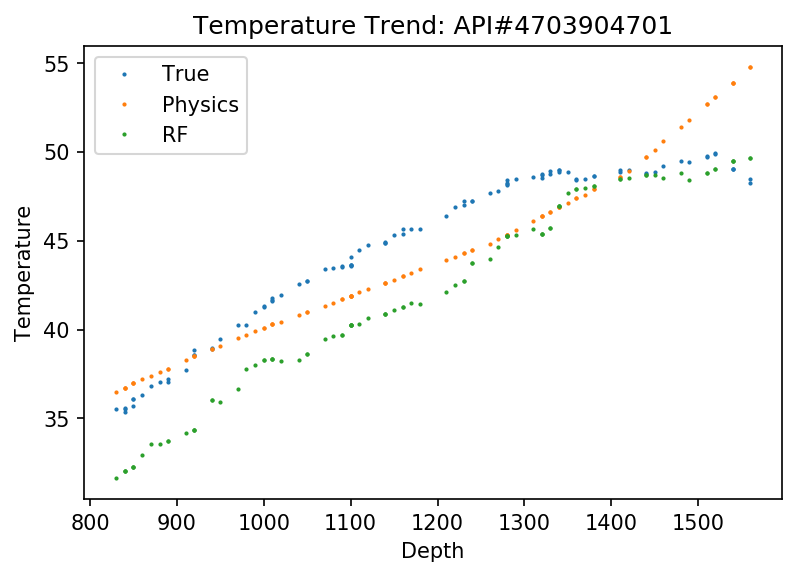

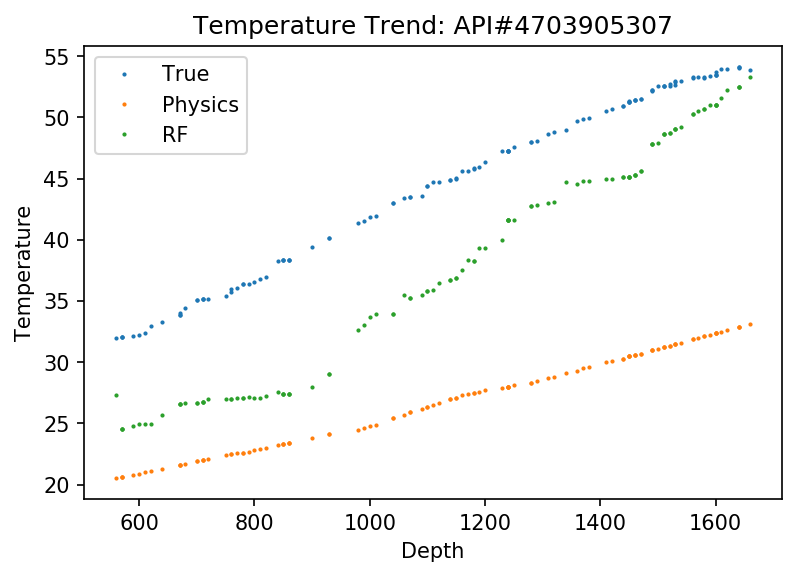

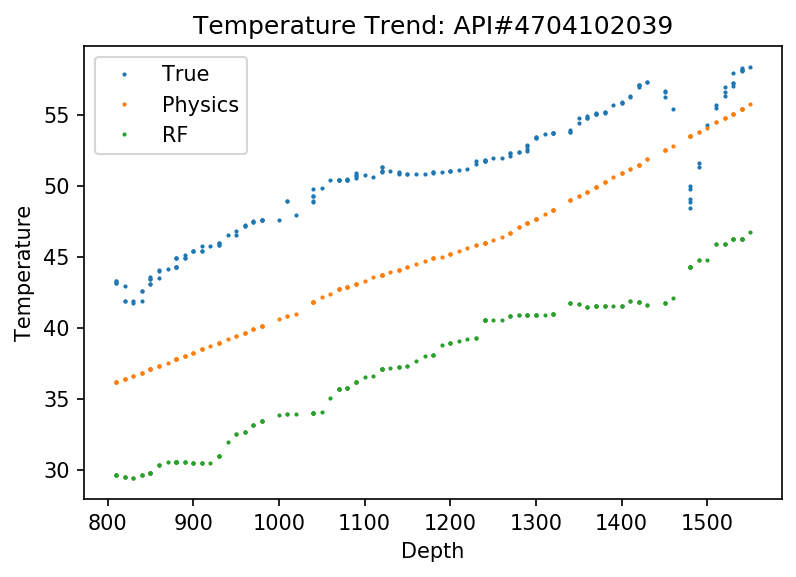

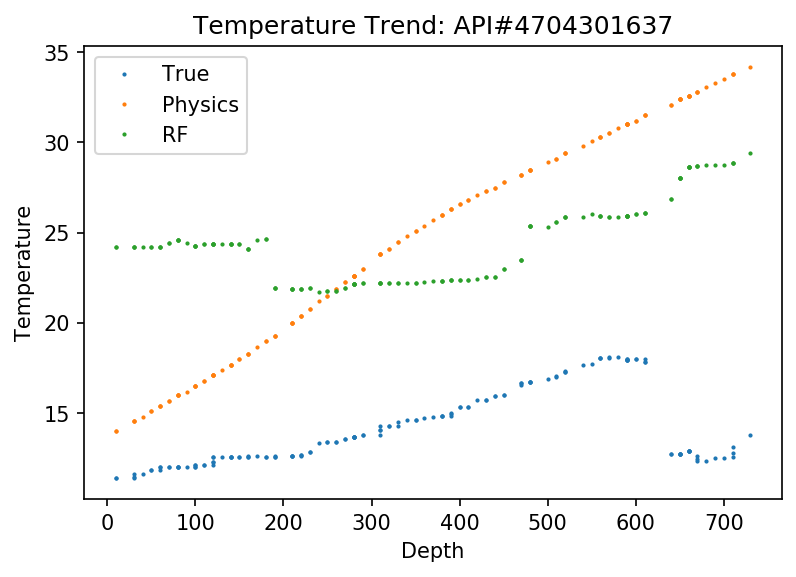

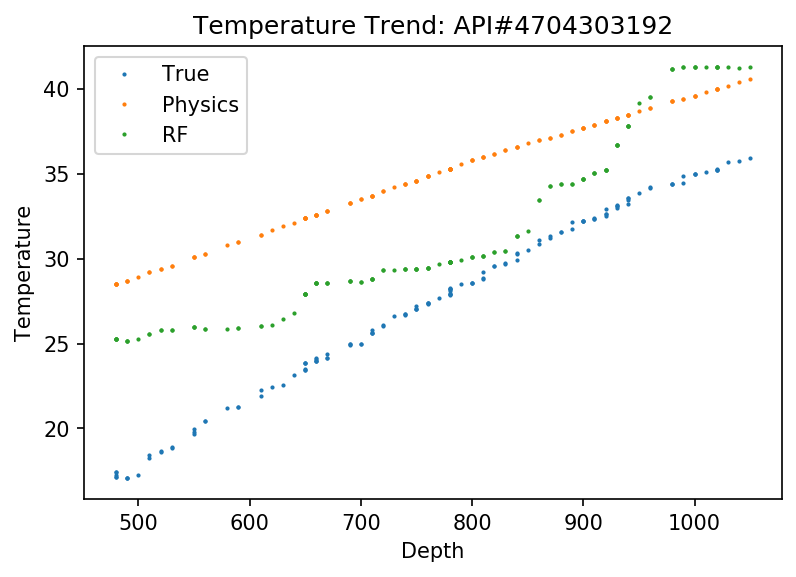

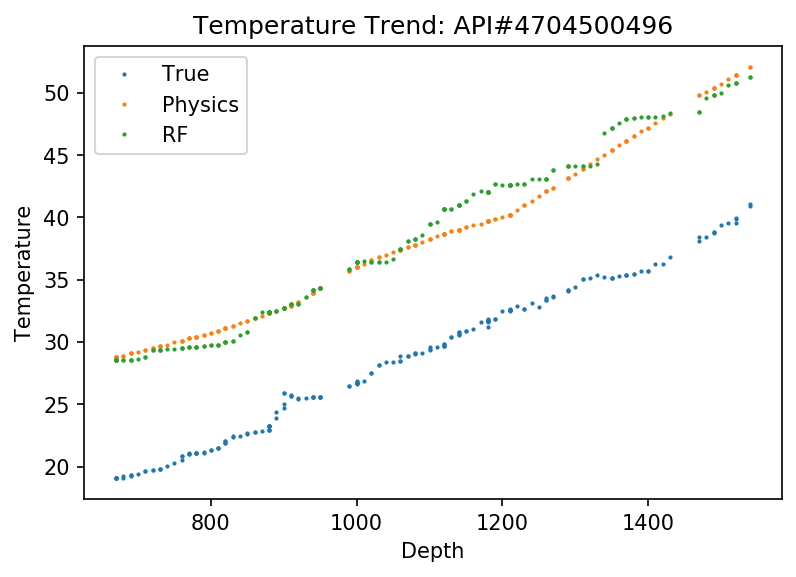

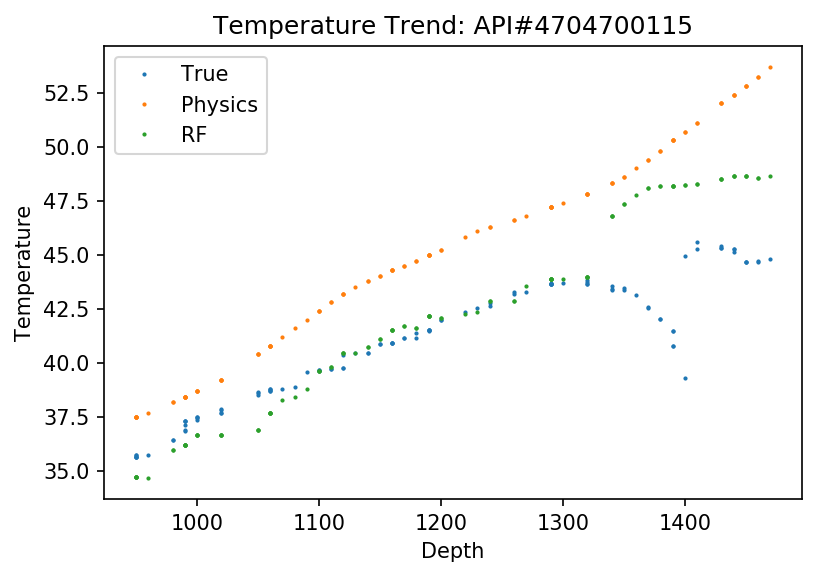

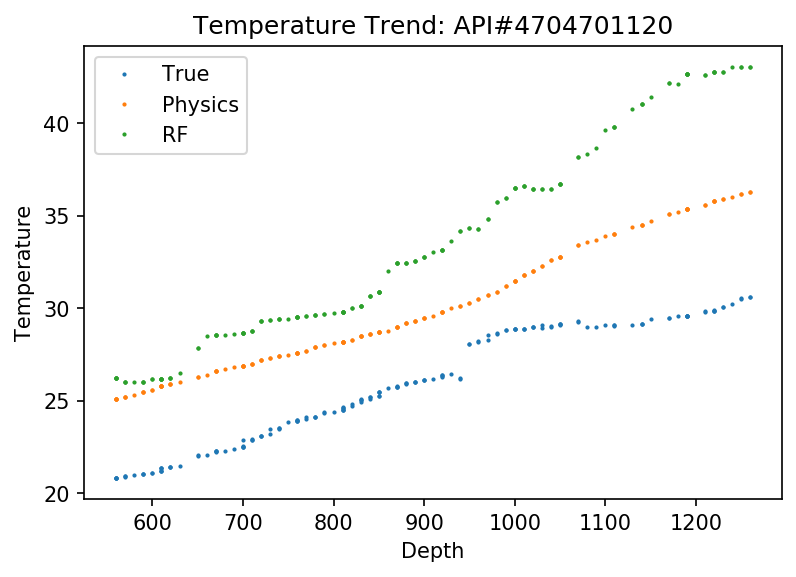

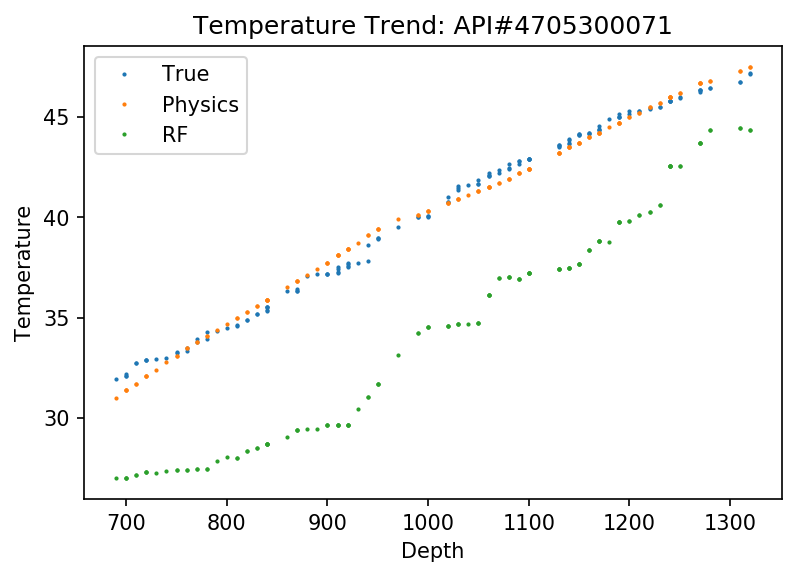

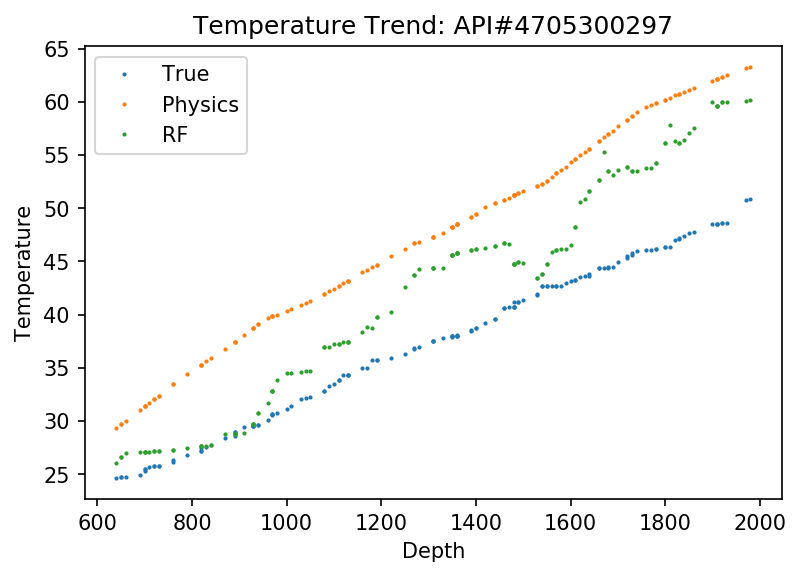

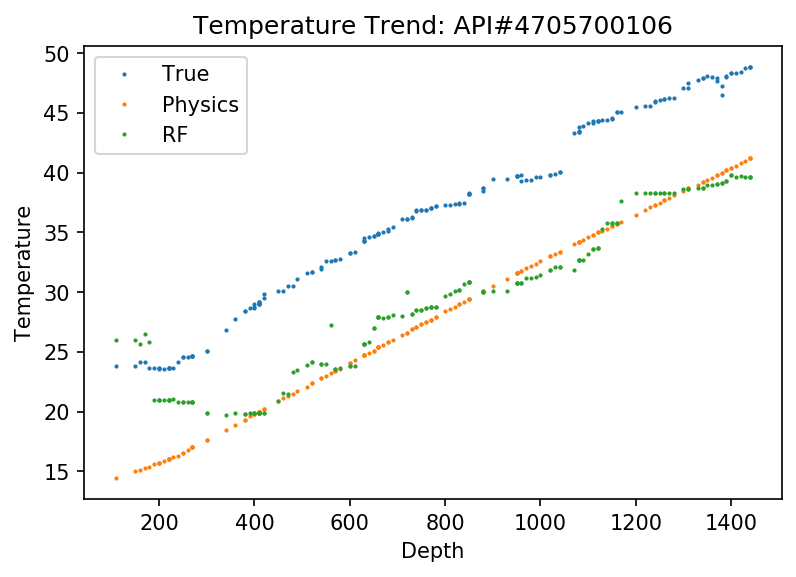

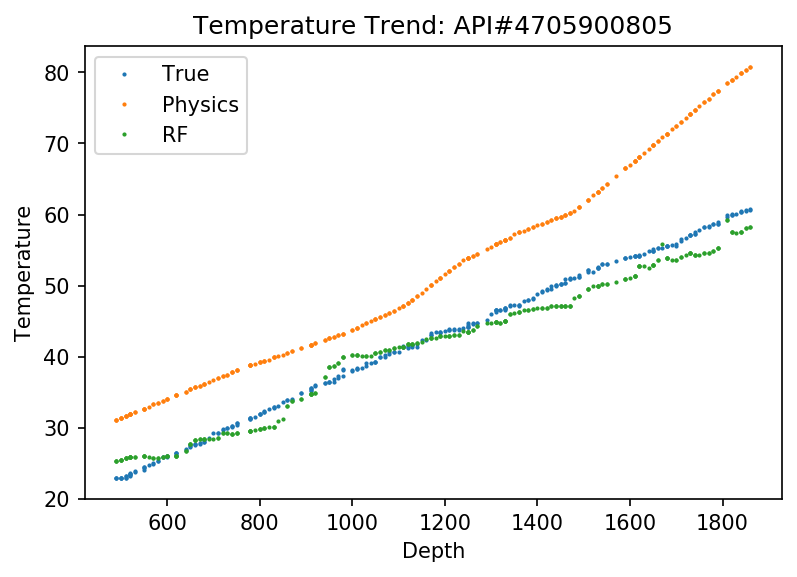

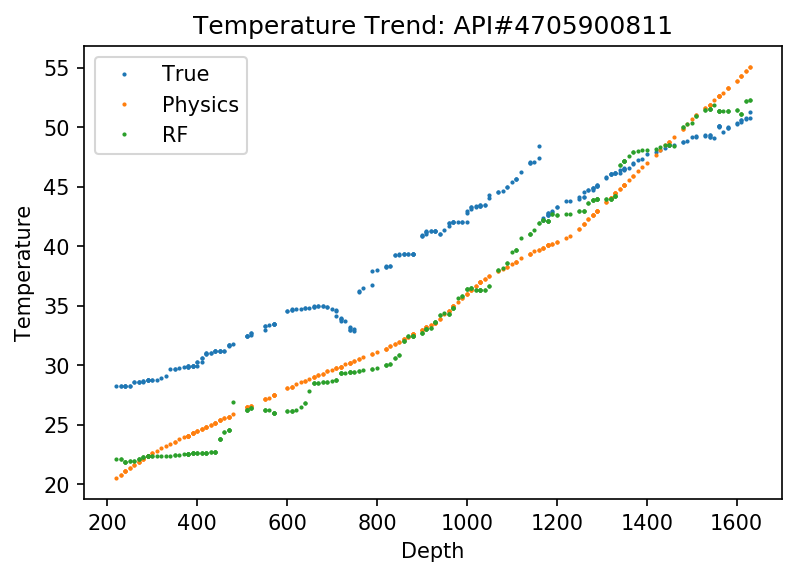

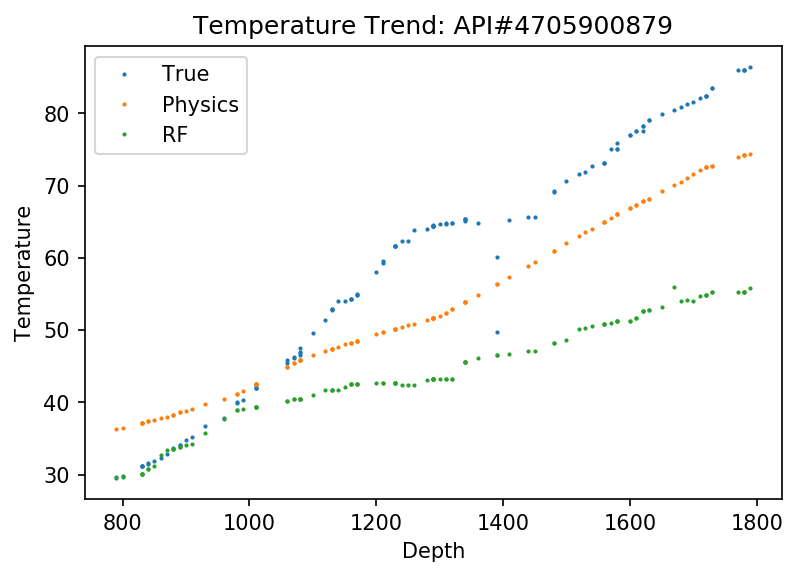

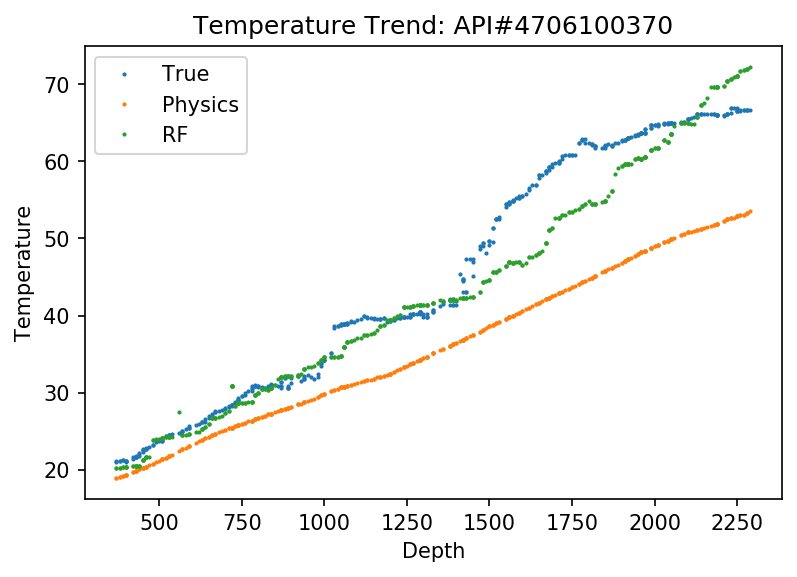

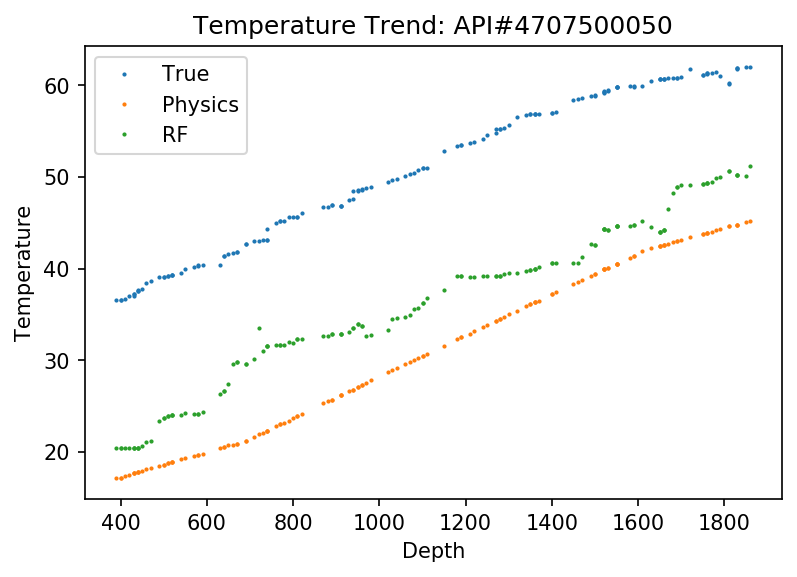

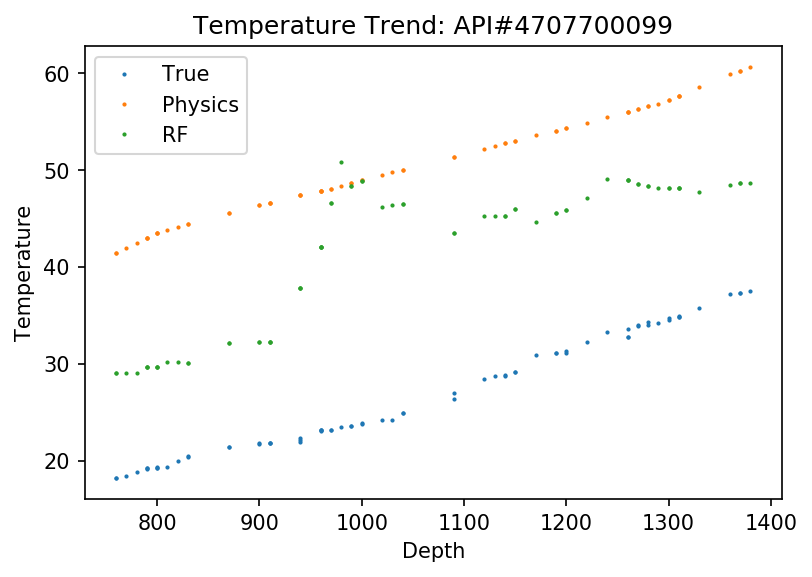

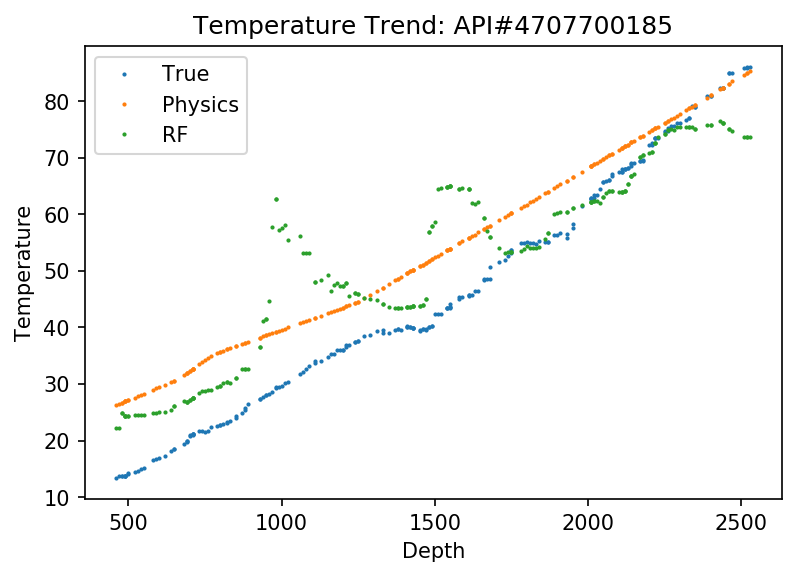

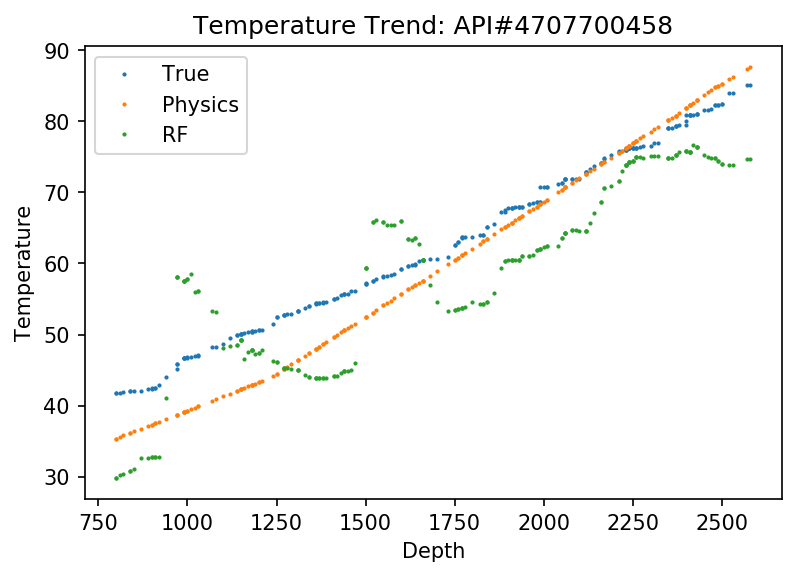

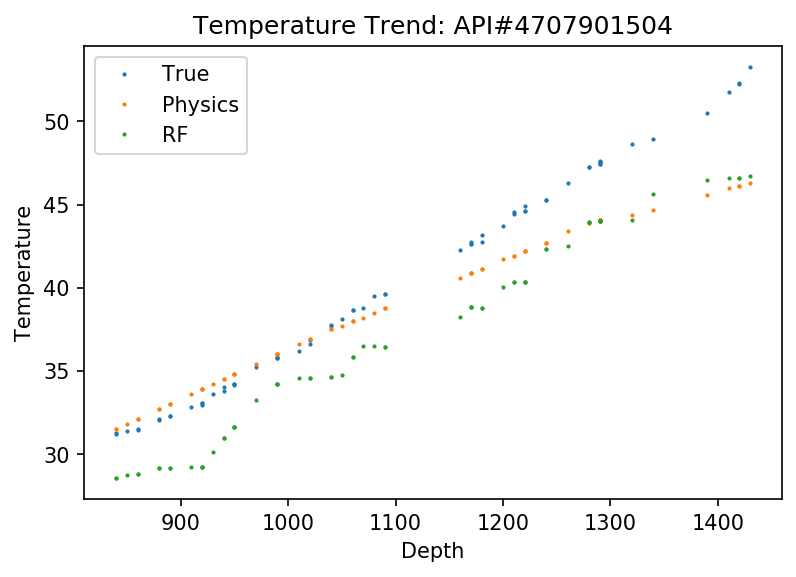

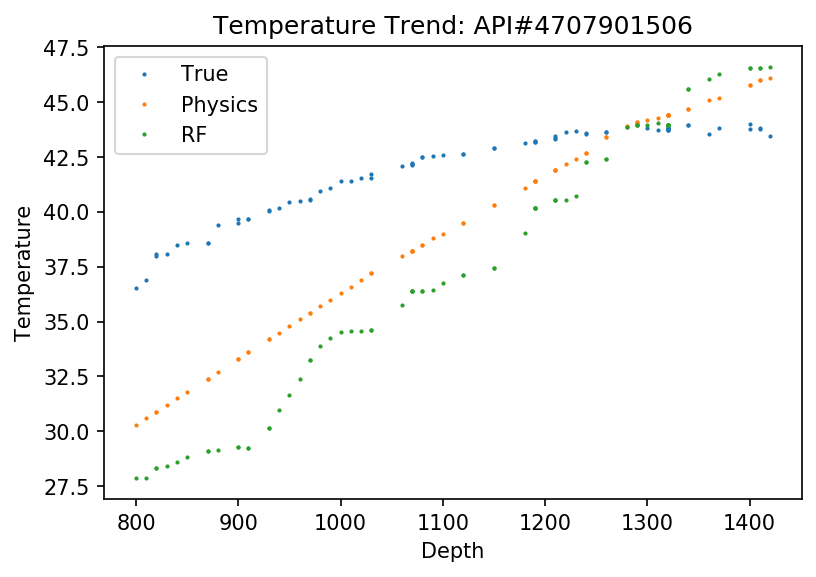

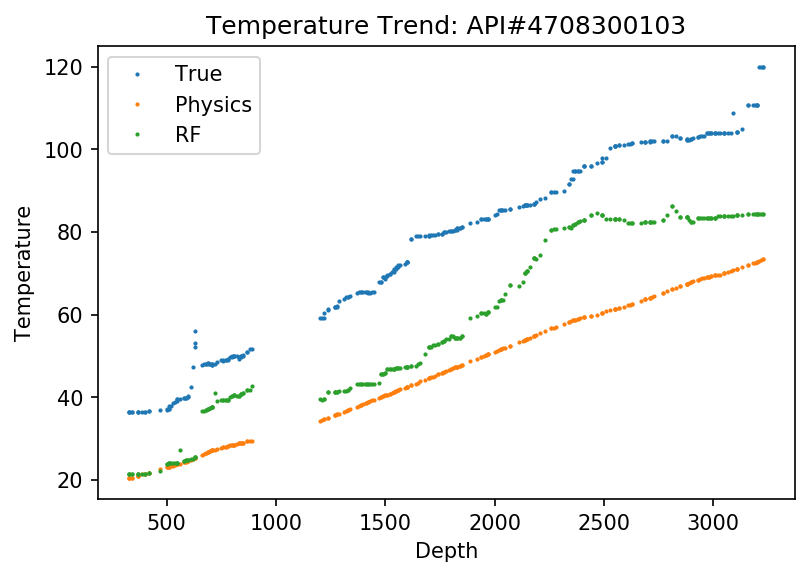

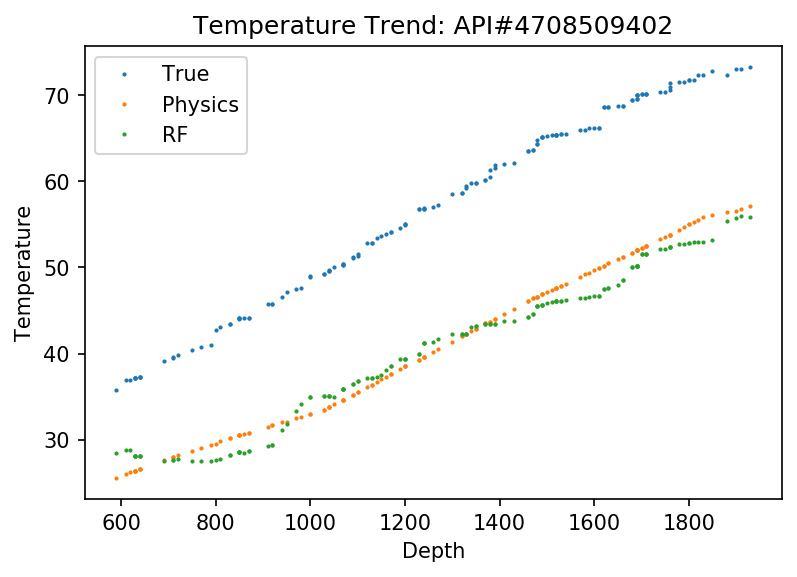

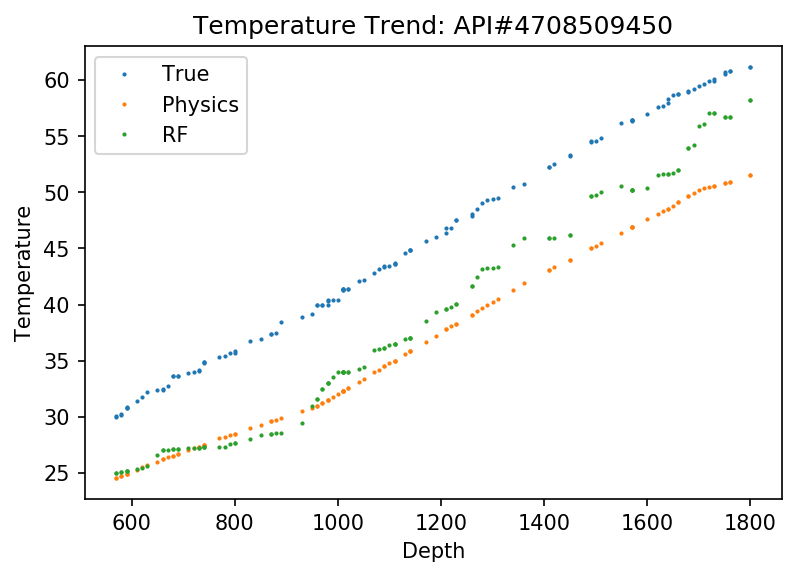

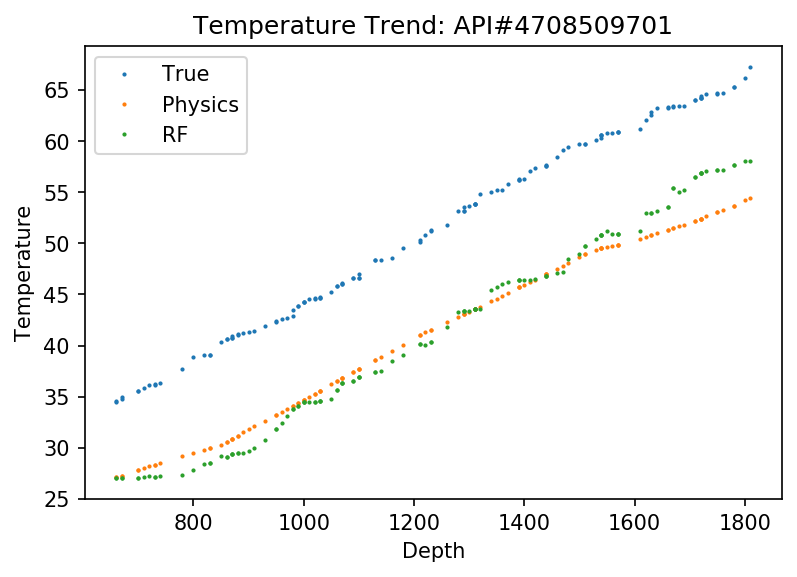

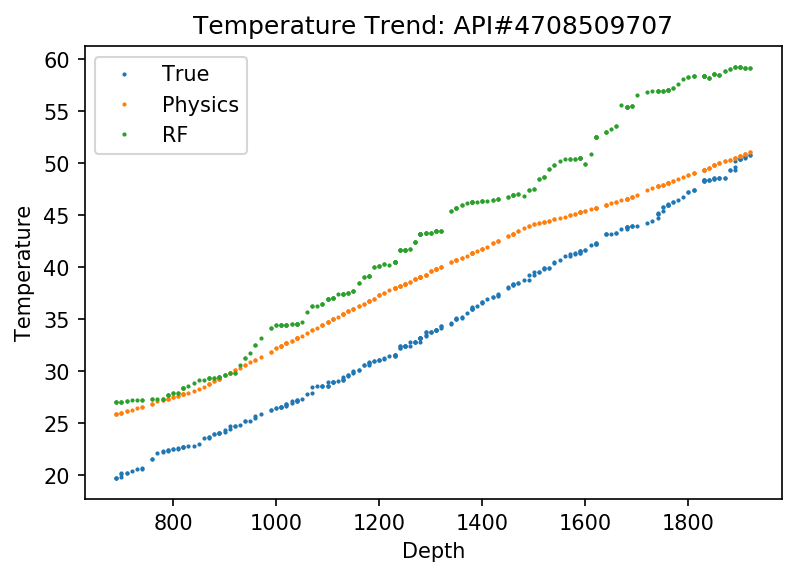

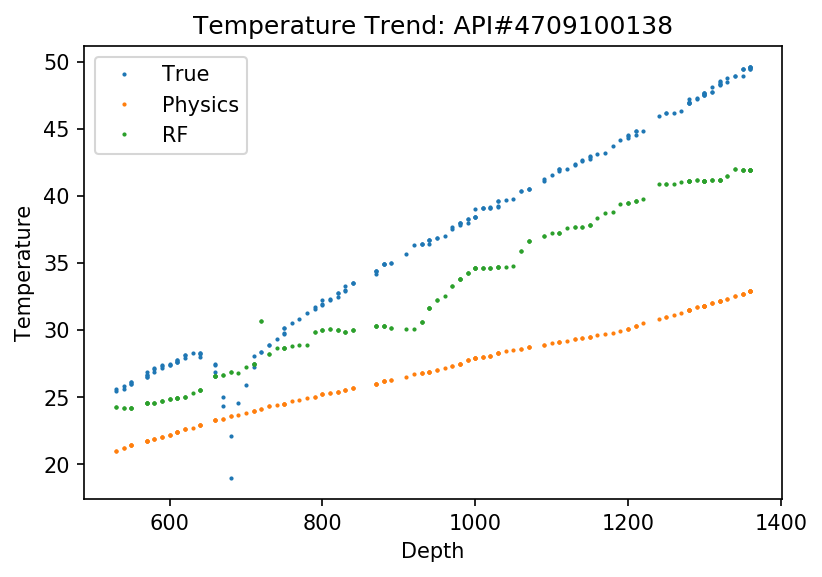

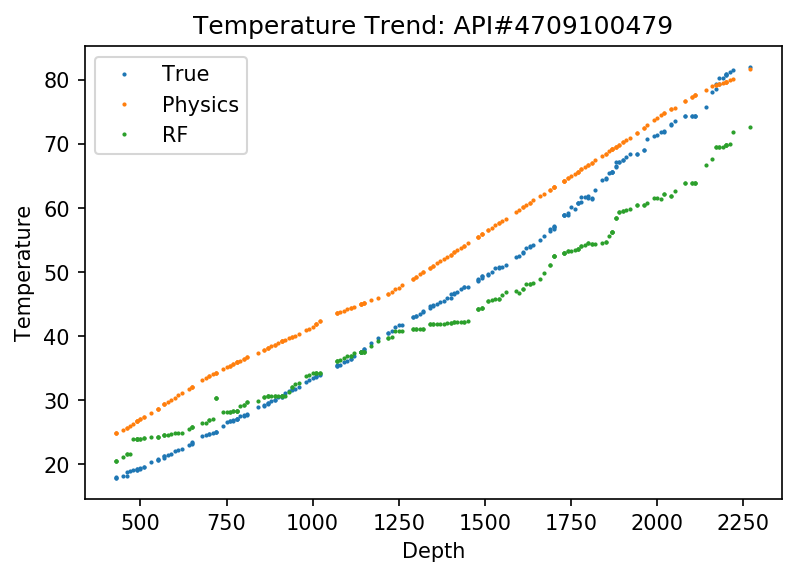

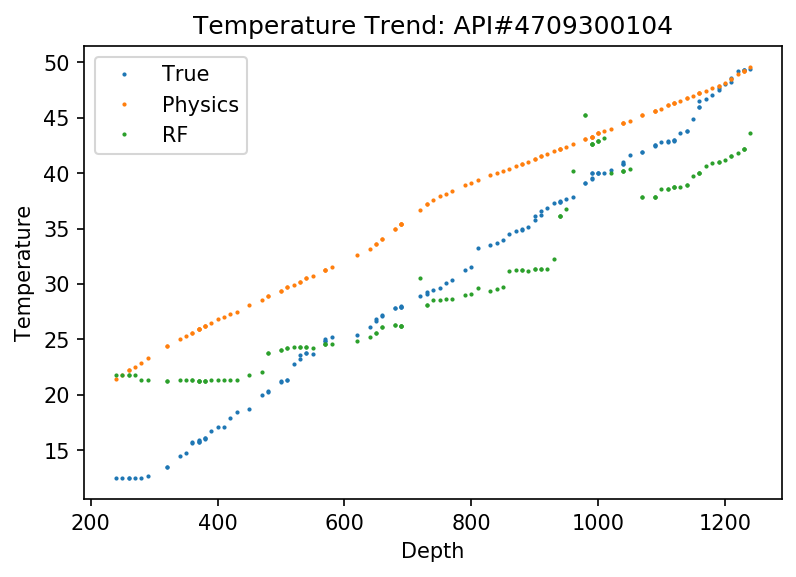

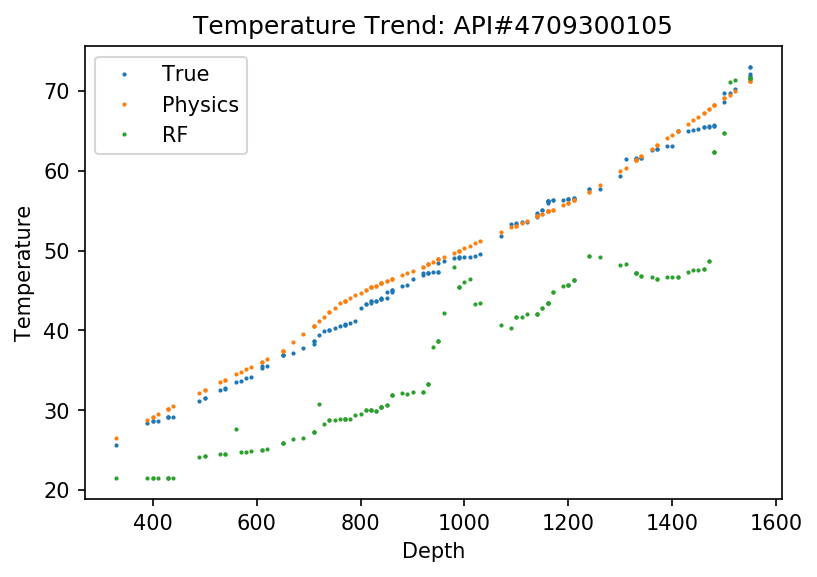

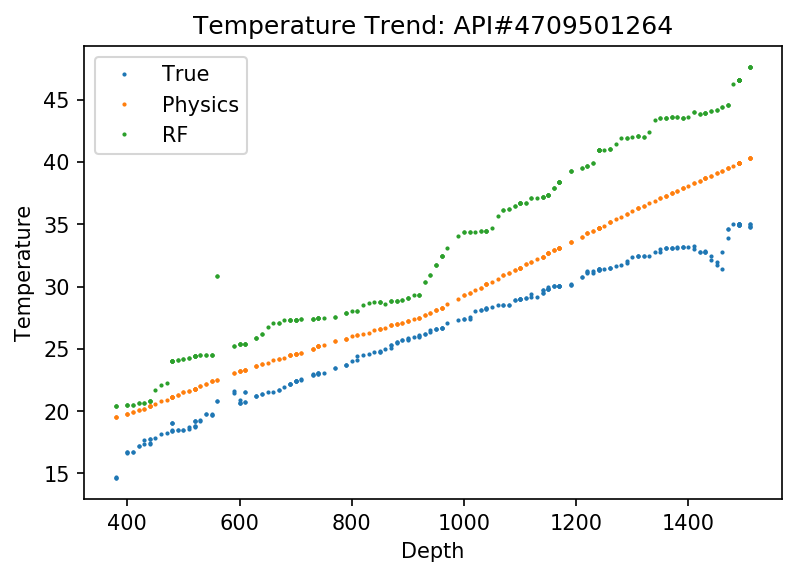

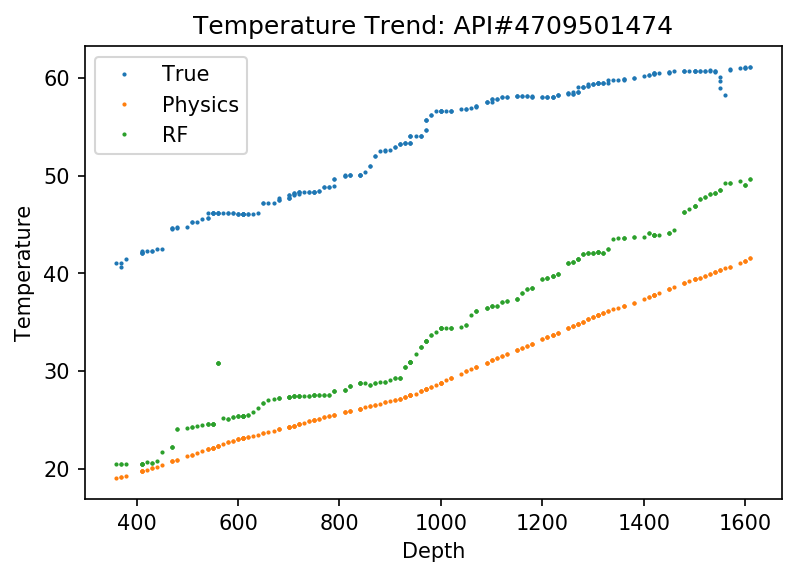

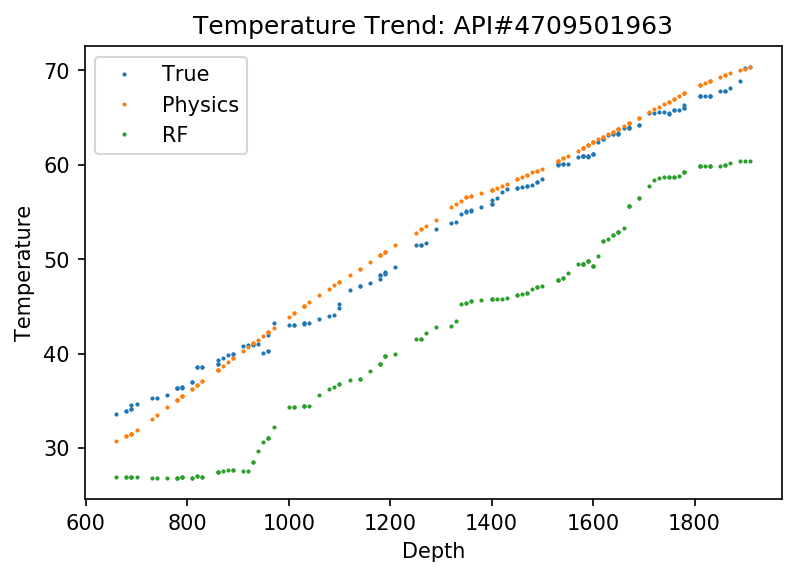

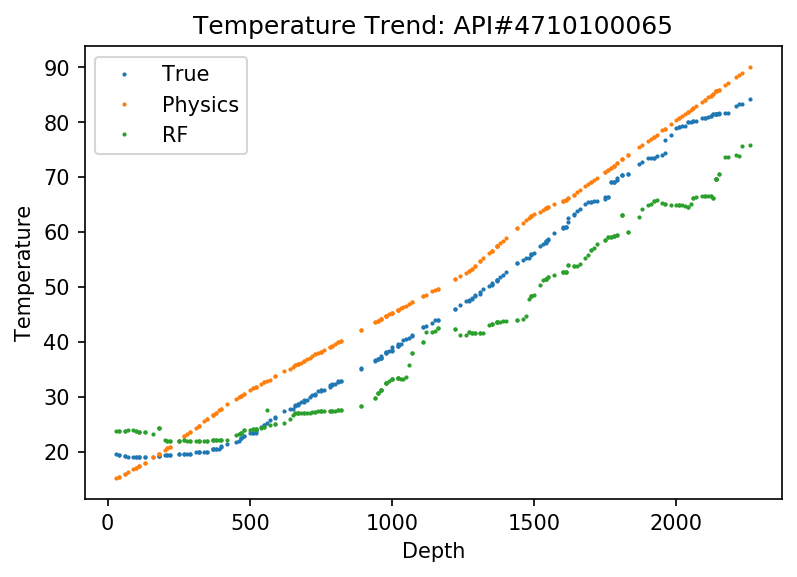

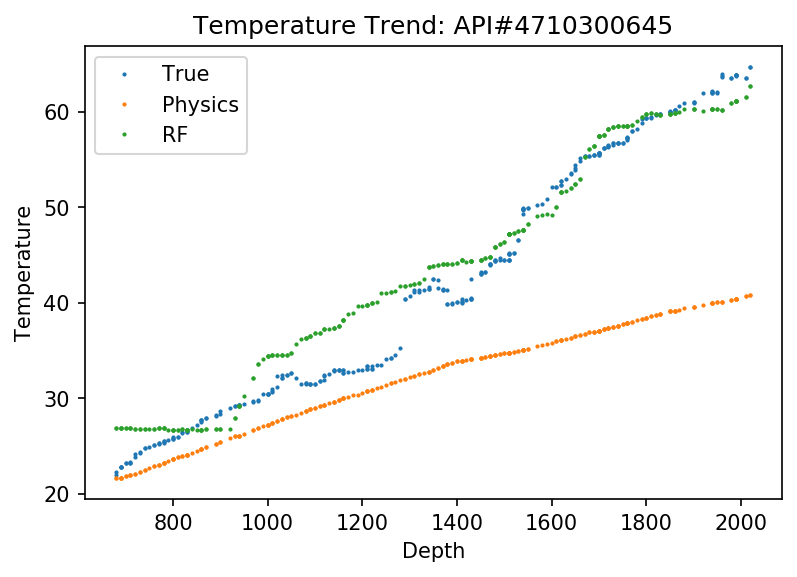

In [38]:
for curr_id in np.unique(sampled_df2.id):
    ms = 2
    y_true = sampled_df2[sampled_df2.iloc[:,1]==curr_id]['corrtemp']
    y_physics = sampled_df2[sampled_df2.iloc[:,1]==curr_id]['physics_pred']
    y_rf = sampled_df2[sampled_df2.iloc[:,1]==curr_id]['rf_pred']
    depth_hat = sampled_df2[sampled_df2.iloc[:,1]==curr_id]['depth']
    plt.plot(depth_hat,y_true, lineStyle='none',marker='.',markersize=ms, label='True')
    plt.plot(depth_hat,y_physics,lineStyle='none',marker='.',markersize=ms, label= 'Physics')
    plt.plot(depth_hat,y_rf,lineStyle='none',marker='.',markersize=ms, label='RF')
    plt.legend()
    plt.xlabel('Depth')
    plt.ylabel('Temperature')
    plt.title('Temperature Trend: API#'+str(curr_id))
    plt.show()